# `matplotlib` SpaceX recovery plot

Based on the following tweet:

https://x.com/stats_feed/status/1752629060772171810?s=20

## Imports

In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Fonts

I've used the following `SpaceX` font for the title of this chart:

https://www.fontget.com/font/spacex/

In [3]:
from matplotlib import font_manager

# Add system fonts so matplotlib sees them
for font in font_manager.findSystemFonts(fontpaths=None, fontext='ttf'):
    font_manager.fontManager.addfont(font)

In [4]:
# DEV
from datetime import date

metadata_dict = {
    "Title": "Twitter/X Matplotlib tutorial",
    "Author": "Pawel Jastrzebski (pawjast)",
    "Description": "https://medium.com/@pawjast https://twitter.com/pawjast https://github.com/pawjast www.linkedin.com/in/pawjast https://www.youtube.com/@pawjast https://pawjast.substack.com/",
    "Creation Time": f"{date.today():%d %B %Y}",
    "Source": "https://twitter.com/pawjast"
}

## Data

In [5]:
df = pd.DataFrame.from_dict(
    {
        2023: [99, 99],
        2022: [43, 43],
        2021: [30, 31],
        2020: [23, 25],
        2019: [15, 16],
        2018: [13, 15],
        2017: [15, 15],
        2016: [5, 8],
        2015: [2, 4],
        2014: [2, 3],
        2013: [0, 1],
    },
    orient="index",
    columns=["recovered", "all"]
)

df["rate"] = df["recovered"] / df["all"]

# Normally you'd want to convert date to a `datetime format`but in this case
# It complicates the plotting so we're skipping the process

# Convert index from `int` to `DateTime`
# df.index = pd.to_datetime(df.index, format="%Y")

df


,recovered,all,rate
2023,99,99,1.000000
2022,43,43,1.000000
2021,30,31,0.967742
2020,23,25,0.920000
2019,15,16,0.937500
2018,13,15,0.866667
2017,15,15,1.000000
2016,5,8,0.625000
2015,2,4,0.500000
2014,2,3,0.666667


## Plot

In [6]:
# Settings
rcParams.update(
    {
        "figure.facecolor": "black",
        "figure.figsize": (16, 12),
        "axes.facecolor": (0.0, 0.0, 0.0, 0.0),
        "axes.spines.left": False,
        "axes.spines.top": False,
        "axes.spines.right": False,
        "axes.linewidth": 3,
        "axes.edgecolor": "white",
        "axes.grid": True,
        "axes.grid.axis": "y",
        "axes.axisbelow": True,
        "axes.labelcolor": "white",
        "axes.titley": 0.98,
        "grid.color": "white",
        "grid.linewidth": 0.4,
        "font.family": "Roboto",
        "font.size": 22,
        "text.color": "white",
        "xtick.labelcolor": "white",
        "ytick.labelcolor": "white",
        "xtick.bottom": False,
        "ytick.left": False,
        "legend.frameon": False,
        "legend.loc": "upper left",
        "axes.titlelocation": "left"
    }
)

Text(1, -0.11, 'by @pawjast\nmade with @matplotlib ♥')

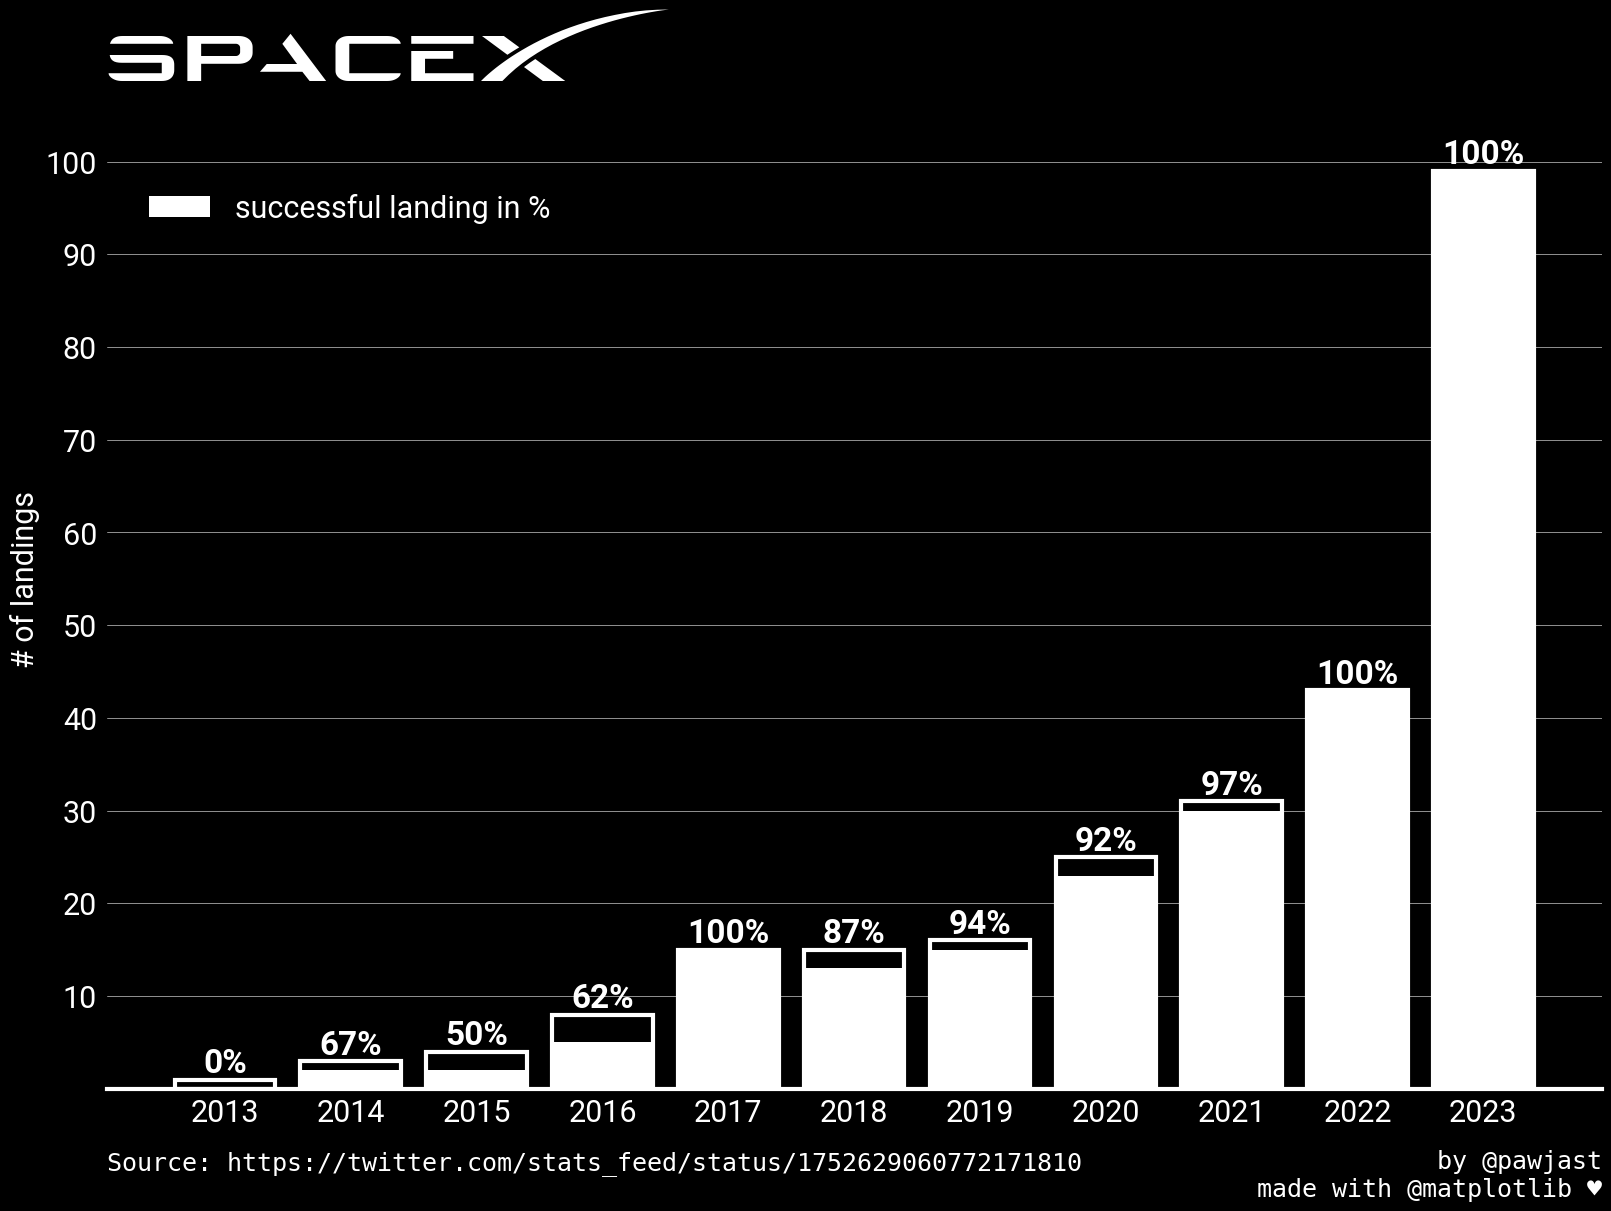

In [7]:
fig, ax = plt.subplots(
    layout="constrained"
)

ax.set_title(
    "SpaceX",
    fontname="SpaceX",
    fontsize=50,
)


ax.bar(
    x=df.index,
    height=df["all"],
    facecolor="black",
    edgecolor="white",
    linewidth=3
)
ax.bar(
    x=df.index,
    height=df["recovered"],
    label="successful landing in %",
    facecolor="white",
    edgecolor=(0.0, 0.0, 0.0, 0.0)
)

ax.set_xticks(
    df.index
)
ax.set_yticks(
    range(10, 110, 10)
)
ax.set_ylim(0, 110)
ax.set_ylabel("# of landings")

ax.legend(
    bbox_to_anchor=(0.01, 0.905)
)

# Add bar data labels
for items in df.iterrows():
    x_pos = items[0]
    y_pos = items[1][1]
    y_val = items[1][2]
    ax.text(
        x_pos, y_pos,
        f"{y_val:.0%}",
        ha="center",
        va="bottom",
        fontsize=24,
        weight="bold"
    )

# Footer
ax.text(
    0.0, -0.085,
    "Source: https://twitter.com/stats_feed/status/1752629060772171810",
    transform = ax.transAxes,
    horizontalalignment="left",
    verticalalignment="bottom",
    # color="#9a9996",
    fontsize=18,
    family="monospace",
    weight="medium"
)
ax.text(
    1, -0.11,
    "by @pawjast\nmade with @matplotlib \u2665",
    transform = ax.transAxes,
    horizontalalignment="right",
    verticalalignment="bottom",
    # color="#9a9996",
    fontsize=18,
    family="monospace",
    weight="medium"
);

# plt.savefig(
#     fname="name.png",
#     format="png",
#     dpi=125,
#     metadata=metadata_dict
# );